<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Intro to Tensor Flow and Keras - simple model</h2>


! pip install -U tensorflow tensorboard

In [1]:
import os
import sys
import re
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary

from google.protobuf import struct_pb2

%load_ext tensorboard
%matplotlib inline

2022-01-29 16:27:51.365948: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-29 16:27:51.365967: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
print(tf.__version__)
try:
    physical_devices = tf.config.list_physical_devices('GPU') 
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print(physical_devices)
except:
    print("No GPU")

2.7.0
No GPU


2022-01-29 16:27:52.651848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 16:27:52.652679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-29 16:27:52.652733: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-29 16:27:52.652780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-29 16:27:52.652826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

First we'll develop a small ANN with Keras:

In [4]:
# load pima indians dataset
dataset = np.loadtxt("../../../data/pima-indians-diabetes.csv", delimiter=",")

In [5]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [32]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers
#https://www.tensorflow.org/api_docs/python/tf/keras/activations
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics

# Create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"))

In [33]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5778 - val_loss: 0.6873 - val_accuracy: 0.6811
Epoch 2/200
52/52 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.6362 - val_loss: 0.6659 - val_accuracy: 0.6732
Epoch 3/200
52/52 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.6420 - val_loss: 0.6558 - val_accuracy: 0.6772
Epoch 4/200
52/52 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.6401 - val_loss: 0.6460 - val_accuracy: 0.6811
Epoch 5/200
52/52 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6401 - val_loss: 0.6456 - val_accuracy: 0.6772
Epoch 6/200
52/52 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6440 - val_loss: 0.6426 - val_accuracy: 0.6693
Epoch 7/200
52/52 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6595 - val_loss: 0.6337 - val_accuracy: 0.6772
Epoch 8/200
5

In [35]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


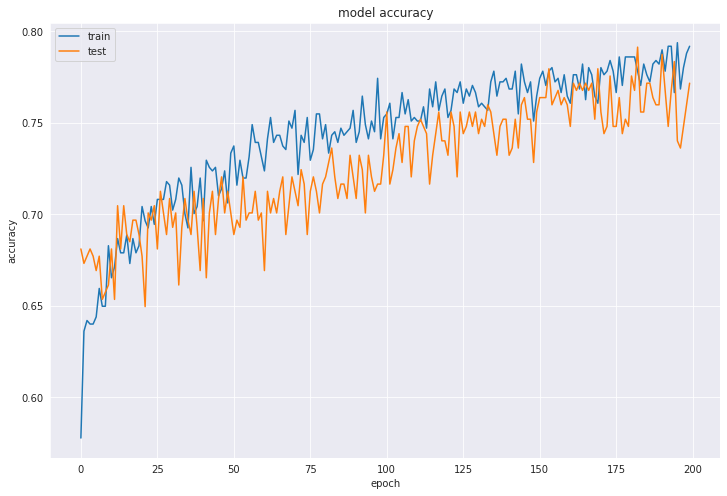

In [36]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

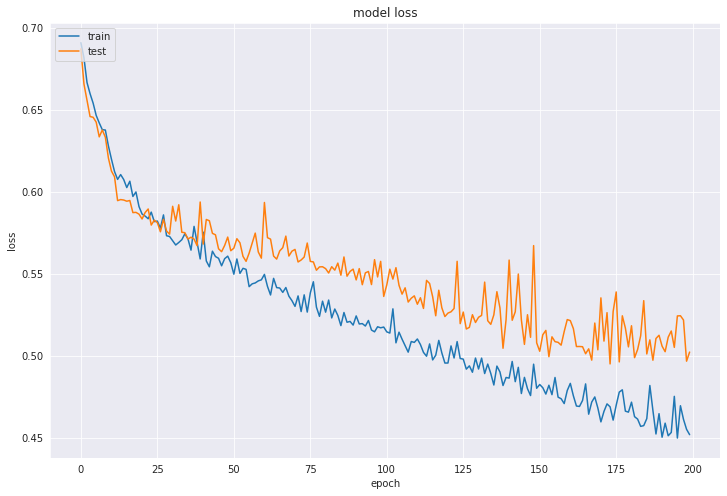

In [37]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n{}: {}".format(model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7643

accuracy: 76.43229365348816


In [12]:
# calculate predictions
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

for pred in list(zip(predictions[0:10], rounded[0:10])):
    print(pred)

(array([0.5152304], dtype=float32), 1)
(array([0.08283722], dtype=float32), 0)
(array([0.85470164], dtype=float32), 1)
(array([0.08048898], dtype=float32), 0)
(array([0.7747296], dtype=float32), 1)
(array([0.21584362], dtype=float32), 0)
(array([0.16632149], dtype=float32), 0)
(array([0.68787384], dtype=float32), 1)
(array([0.5830231], dtype=float32), 1)
(array([0.24892956], dtype=float32), 0)
